## Preprocessing

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Drop the 'EIN' and 'NAME' columns
application_df = application_df.drop(columns=['EIN', 'NAME'])


In [6]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()

In [7]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
# Check the value counts for APPLICATION_TYPE
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Display the value counts
print(app_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [8]:
# Choose a cutoff value
cutoff_value = 500

# Identify application types to replace
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

# Replace application types in the DataFrame
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure replacement was successful
print(application_df['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [9]:
# Check the value counts for CLASSIFICATION
classification_counts = application_df['CLASSIFICATION'].value_counts()

In [10]:
# Check the value counts for CLASSIFICATION and filter for counts > 1
classification_counts = application_df['CLASSIFICATION'].value_counts()
filtered_classification_counts = classification_counts[classification_counts > 1]


In [11]:
# Choose a cutoff value
cutoff_value = 1000

# Identify classifications to replace
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [13]:
# Split the preprocessed data into features (X) and target (y)
X = application_df.drop(columns=['IS_SUCCESSFUL'])  # Drop the target column to form feature set
y = application_df['IS_SUCCESSFUL']  # Target array

# Split the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization of the Model

In [19]:
# Define the neural network model
nn = tf.keras.models.Sequential()

# Input layer and first hidden layer (e.g., 128 nodes with ReLU activation)
nn.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
nn.add(tf.keras.layers.BatchNormalization())  # Add BatchNormalization

# Dropout layer to prevent overfitting
nn.add(tf.keras.layers.Dropout(0.2))  # Dropout rate of 20%

# Second hidden layer (e.g., 64 nodes with ReLU activation)
nn.add(tf.keras.layers.Dense(units=64, activation='relu'))
nn.add(tf.keras.layers.BatchNormalization())  #  BatchNormalization

# Dropout layer to prevent overfitting
nn.add(tf.keras.layers.Dropout(0.2))  # Dropout rate of 20%

# Third hidden layer (e.g., 32 nodes with ReLU activation)
nn.add(tf.keras.layers.Dense(units=32, activation='relu'))
nn.add(tf.keras.layers.BatchNormalization())  #  BatchNormalization

# Output layer (single node with sigmoid activation for binary classification)
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer='adam',  # Adam optimizer
           loss='binary_crossentropy',  # Binary cross-entropy for binary classification
           metrics=['accuracy'])

# Print the model summary to verify the architecture
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,449 (64.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
# Train the model
# Convert X_train and y_train to numpy arrays with the appropriate data type
X_train = X_train.values.astype('float32')
y_train = y_train.values.astype('float32')

# Convert X_test and y_test as well (if needed)
X_test = X_test.values.astype('float32')
y_test = y_test.values.astype('float32')

# Now, train the model again
history = nn.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))

Epoch 1/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5126 - loss: 0.7346 - val_accuracy: 0.5345 - val_loss: 0.6997
Epoch 2/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5212 - loss: 0.6946 - val_accuracy: 0.5348 - val_loss: 0.7051
Epoch 3/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5235 - loss: 0.6944 - val_accuracy: 0.5341 - val_loss: 0.7027
Epoch 4/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5240 - loss: 0.6934 - val_accuracy: 0.5340 - val_loss: 0.6907
Epoch 5/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5329 - loss: 0.6924 - val_accuracy: 0.5341 - val_loss: 0.6910
Epoch 6/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5311 - loss: 0.6915 - val_accuracy: 0.5340 - val_loss: 0.6934
Epoch 7/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5320 - loss: 0.6918 - val_accuracy: 0.5341 - val_loss: 0.6924
Epoch 8/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5340 - loss: 0.6915 - val_accuracy: 0.

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 1ms/step - accuracy: 0.5146 - loss: 10.6307
Loss: 10.630702018737793, Accuracy: 0.5145772695541382


In [23]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimisation.h5')

# Confirm the model has been saved
print("Model saved to AlphabetSoupCharity_Optimisation.h5")

Model saved to AlphabetSoupCharity_Optimisation.h5


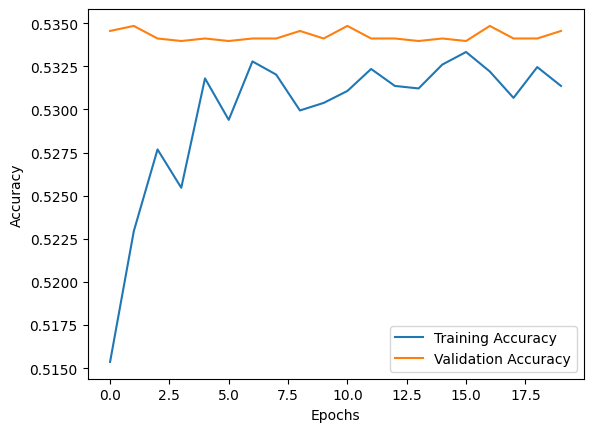

In [25]:
# Visualisations

import matplotlib.pyplot as plt
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()